# Explore Data:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.preprocessing import preprocess_data
from src.features import create_features
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
# Load the dataset
df_raw = pd.read_csv("../data/raw/amazon_sales.csv")
df_clean = preprocess_data(df_raw)
df_eda = df_clean.copy()
df_features = create_features(df_clean)




In [3]:
df_features.head()
df_features.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            50000 non-null  float64
 1   discount_percent                 50000 non-null  int64  
 2   rating                           50000 non-null  float64
 3   review_count                     50000 non-null  int64  
 4   total_revenue                    50000 non-null  float64
 5   order_month                      50000 non-null  int32  
 6   order_year                       50000 non-null  int32  
 7   product_category_Books           50000 non-null  bool   
 8   product_category_Electronics     50000 non-null  bool   
 9   product_category_Fashion         50000 non-null  bool   
 10  product_category_Home & Kitchen  50000 non-null  bool   
 11  product_category_Sports          50000 non-null  bool   
 12  customer_region_Europe       

# EDA:

In [26]:
# Data Exploration
print("Dataset Shape:", df_eda.shape)
print("\nDataset Info:")
print(df_eda.info())
print("\nMissing Values:\n", df_eda.isnull().sum())
print("\nStatistical Summary:\n", df_eda.describe())

Dataset Shape: (50000, 11)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          50000 non-null  int64         
 1   order_date        50000 non-null  datetime64[us]
 2   product_id        50000 non-null  int64         
 3   product_category  50000 non-null  str           
 4   price             50000 non-null  float64       
 5   discount_percent  50000 non-null  int64         
 6   customer_region   50000 non-null  str           
 7   payment_method    50000 non-null  str           
 8   rating            50000 non-null  float64       
 9   review_count      50000 non-null  int64         
 10  total_revenue     50000 non-null  float64       
dtypes: datetime64[us](1), float64(3), int64(4), str(3)
memory usage: 4.2 MB
None

Missing Values:
 order_id            0
order_date          0
product_id    

## Revenue Understanding:

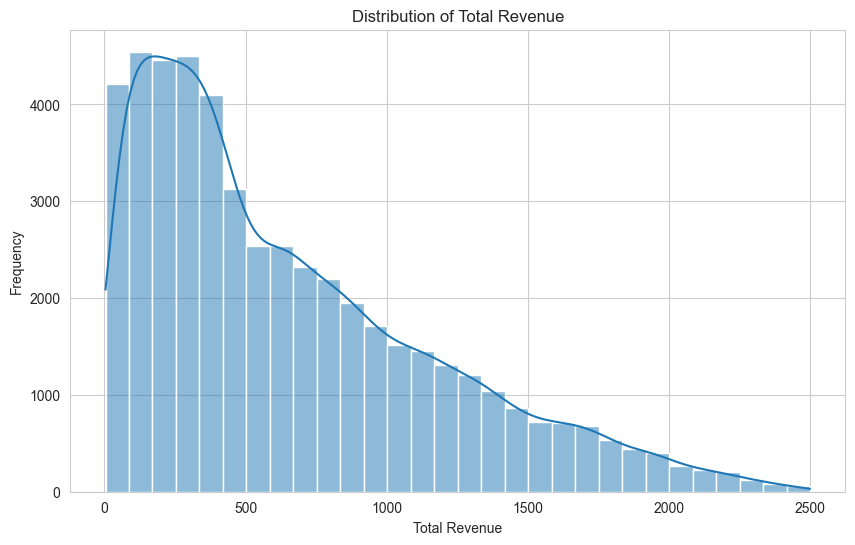

In [27]:
# Distribution of total_revenue
plt.figure(figsize=(10, 6))
sns.histplot(df_eda["total_revenue"], bins=30, kde=True)
plt.title("Distribution of Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.show()


## Category Performance:

/var/folders/5j/4qz3kj0554x_34qmqj0s41br0000gn/T/ipykernel_38859/3940657031.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="product_category", y="total_revenue", data=df, estimator=sum, ci=None)


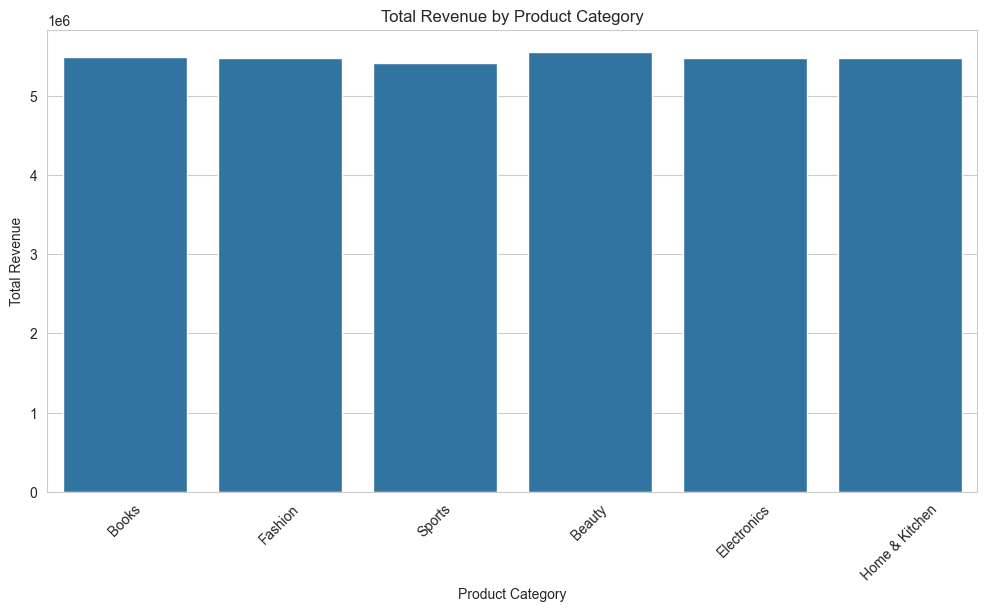

In [28]:
# Revenue by product_category:
plt.figure(figsize=(12, 6))
sns.barplot(x="product_category", y="total_revenue", data=df_eda, estimator=sum, ci=None)
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


## Discount Effects:

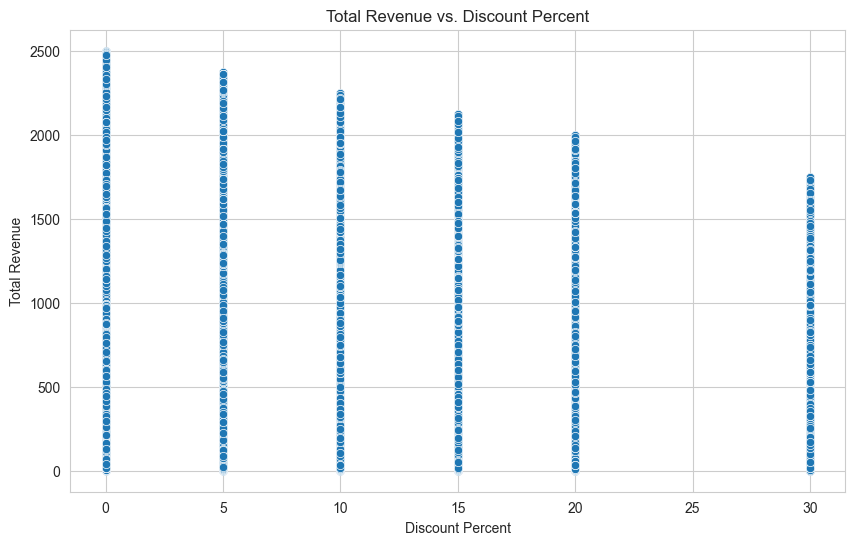

In [29]:
# total_revenue vs. discount_percent:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="discount_percent", y="total_revenue", data=df_eda)
plt.title("Total Revenue vs. Discount Percent")
plt.xlabel("Discount Percent")
plt.ylabel("Total Revenue")
plt.show()


## Ratings & Reviews:

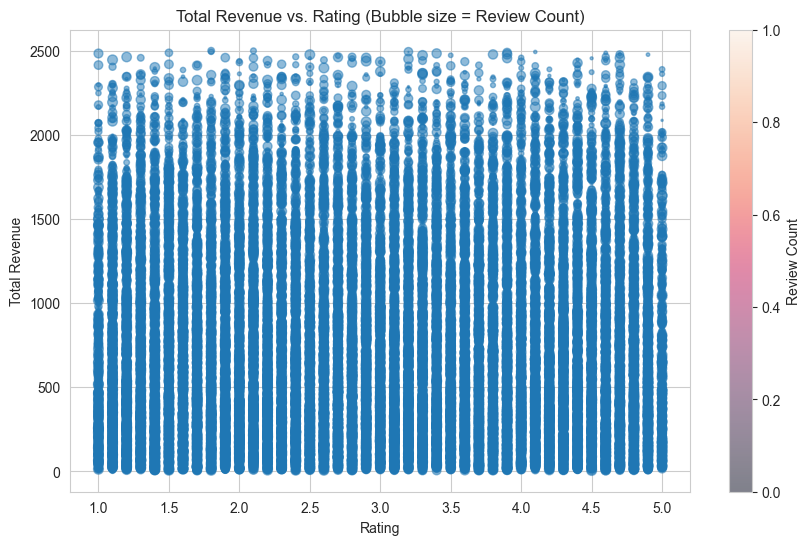

In [ ]:
# Relationship between rating, review_count, and total_revenue:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_eda["rating"],
    df_eda["total_revenue"],
    s=df_eda["review_count"] / 10,  # Scale down for better visibility
    alpha=0.5,
)
plt.title("Total Revenue vs. Rating (Bubble size = Review Count)")
plt.xlabel("Rating")
plt.ylabel("Total Revenue")
plt.colorbar(scatter, label="Review Count")
plt.show()

## Time-Based Trends:

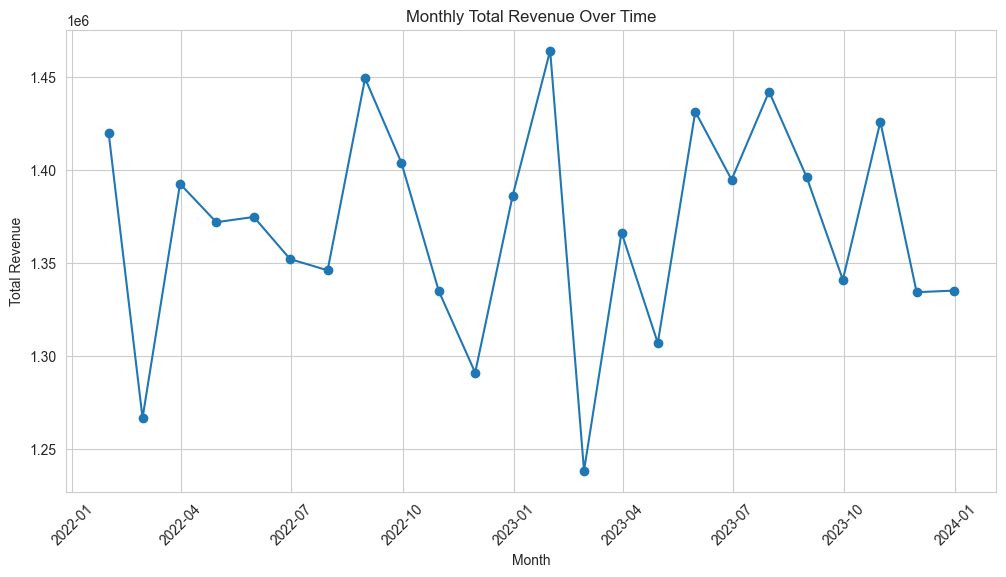

In [31]:
# Revenue over time(monthly):
if "order_date" in df_eda.columns:
	df_eda["order_date"] = pd.to_datetime(df_eda["order_date"])
	df_eda.set_index("order_date", inplace=True)
else:
	# If 'order_date' is already the index or the index contains datetime strings,
	# ensure the index is datetime and name it 'order_date'
	if not pd.api.types.is_datetime64_any_dtype(df_eda.index):
		try:
			df_eda.index = pd.to_datetime(df_eda.index)
		except Exception:
			raise KeyError("No 'order_date' column and index could not be converted to datetime.")
	df_eda.index.name = "order_date"

# Use 'ME' (month end) frequency instead of deprecated 'M'
monthly_revenue = df_eda["total_revenue"].resample("ME").sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o")
plt.title("Monthly Total Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


- What does the monthly revenue trend suggest about business stability?
    - The rather tight range of revenues over 2 years suggest matruity within the categories. No signs of growth or categorical increase. Some seasonality exists.
- Why is regression appropriate here?
    - We aren't forecasting but rather estimating expected revenue per order...perfect for regression.
- What time-based features do you think are worth creating?
    - order_month and order_year are two features that could help our model with predictions...handling seasonality.